<a href="https://colab.research.google.com/github/PrajwalKalpande/IPL-Score-and-Winner-Prediction/blob/main/IPL_ML_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import math,os
from numpy.random import choice
#import scikitplot as skplt
from time import time
import matplotlib.pyplot as plt


In [2]:

from sklearn.linear_model import LinearRegression,ElasticNet, LogisticRegression
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor 
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC,LinearSVR
from sklearn.metrics import f1_score,accuracy_score , roc_auc_score,roc_curve,precision_score,recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
 

# Loading Old Data 

In [ ]:
# import zipfile
# from google.colab import drive

# drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!gdown --id 1-1GquSTepRhy39-kcf1SsnKGARuR0grJ

Downloading...
From: https://drive.google.com/uc?id=1-1GquSTepRhy39-kcf1SsnKGARuR0grJ
To: /content/ipl_data.csv
100% 54.1M/54.1M [00:00<00:00, 290MB/s]


In [ ]:
data = pd.read_csv('/content/ipl_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1,SC Ganguly,BB McCullum,P Kumar,0,1,1,0,0,NaN,NaN,NaN,legbyes,Kolkata Knight Riders,Royal Challengers Bangalore,2008
1,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,2,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
2,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,3,BB McCullum,SC Ganguly,P Kumar,0,1,1,0,0,NaN,NaN,NaN,wides,Kolkata Knight Riders,Royal Challengers Bangalore,2008
3,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,4,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008
4,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,5,BB McCullum,SC Ganguly,P Kumar,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,2008


## Converting the String columns to numeric values

In [ ]:
#encoding the numeric values
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data["batting_team"]=encoder.fit_transform(data["batting_team"])
data['bowling_team']=encoder.fit_transform(data["bowling_team"])
data["winner"]=encoder.fit_transform(data["winner"].astype(str))
data["toss_winner"]=encoder.fit_transform(data["toss_winner"])
data["venue"]=encoder.fit_transform(data["venue"])
data["batsman"]=encoder.fit_transform(data["batsman"])
data["non_striker"]=encoder.fit_transform(data["non_striker"])
data["bowler"]=encoder.fit_transform(data["bowler"])
data["team1"]=encoder.fit_transform(data["team1"])
data["team2"]=encoder.fit_transform(data["team2"])

Feature Engineering

In [ ]:
#outcome variable team1_win as team1 winning the match
data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
data.loc[data["toss_winner"]==data["team1"],"team1_toss_win"]=1
data.loc[data["toss_winner"]!=data["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
data["team1_bat"]=0
data.loc[(data["team1_toss_win"]==1) & (data["toss_decision"]=="bat"),"team1_bat"]=1

Getting Total Runs in an Innings 

In [ ]:
data['ball'] = data['over'] + data['ball']/10.0


In [ ]:
data['id_inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)

data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat,id_inning
0,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.1,431,77,264,0,1,1,0,0,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0,3359827
1,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.2,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827
2,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.3,77,427,264,0,1,1,0,0,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0,3359827
3,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.4,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827
4,335982,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.5,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0,3359827


In [ ]:
print(len(data['id'].unique()))
len(data['id_inning'].unique())
# As expected total innings played are twice of the total matches played

812


1624

In [ ]:
data1 = data.copy()
data1 = data1.groupby(by=['id_inning']).sum()['total_runs'].reset_index()
data1.head()

,id_inning,total_runs
0,108259112,172
1,108259113,207
2,108259211,187
3,10825928,184
4,10825934,183


In [ ]:
data2 = pd.merge(left=data1, right=data, on='id_inning', how='right')
print(data2.shape)
data2  = data2.set_index('id')
data2 


(193096, 40)


,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.1,431,77,264,0,1,1,0,0,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.2,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.3,77,427,264,0,1,1,0,0,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.4,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.5,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,bat,8,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2,18,18.6,168,183,176,1,0,1,0,0,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,bat,8,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2,19,19.1,168,183,10,1,0,1,0,0,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1
1237181,12371818,157,Dubai,2020-11-10,TA Boult,6,0,2,8,2,bat,8,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon,2,19,19.2,184,168,10,1,0,1,0,0,NaN,NaN,NaN,NaN,8,2,2020,0.0,1.0,1


In [ ]:
data2.reset_index(inplace= True)
data2.head()

,id,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
0,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.1,431,77,264,0,1,1,0,0,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
1,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.2,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
2,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.3,77,427,264,0,1,1,0,0,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
3,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.4,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
4,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.5,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0




*   total_runs have very high correlation with batsman_runs
 


*    year also has high correlation with match id
 
 



*   Rest of the columns have relatively low correlation values



In [ ]:
# data2.to_csv('/content/drive/MyDrive/WiDS_IPL/ipl_predict_winner.csv')

## Adding current score column

In [ ]:
df = pd.DataFrame()
for i in range(len(data2['inning'].unique())):
    one_inning = data2.loc[data2['inning']==data2['inning'].unique()[i]]
    one_inning = one_inning.sort_values(['year','id_inning','over', 'ball'], ascending=[True,True,True, True])
    one_inning = one_inning[['id_inning','year','inning','ball','venue','batsman','bowler','batting_team','bowling_team',
                             'is_wicket','total_runs_y','total_runs_x','team1_toss_win','team1_win','team1_bat','team1','team2']].reset_index(drop=True)
    #the number of columns are high here since we need the later ones for winner prediction and earlier ones for score prediction                       
    one_inning['current_runs'] = one_inning.groupby(['id_inning'])['total_runs_y'].cumsum()
    one_inning['current_wickets'] = one_inning.groupby(['id_inning'])['is_wicket'].cumsum()
    

    one_inning.tail()
    frame = [df,one_inning]
    df = pd.concat(frame)
print(data2.shape)
print(df.shape)

(193096, 40)
(193096, 19)


## Adding Runs and Wickets in last 5 overs

In [ ]:
df['runs_last5']= df['total_runs_y'].rolling(min_periods=1, window=30).sum()

In [ ]:
df['wickets_last5']= df['is_wicket'].rolling(min_periods=1, window=30).sum()

In [ ]:
df.head()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
0,3359827,2008,1,1.1,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,1,0,1.0,0.0
1,3359827,2008,1,1.2,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,1,0,1.0,0.0
2,3359827,2008,1,1.3,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,2,0,2.0,0.0
3,3359827,2008,1,1.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,2,0,2.0,0.0
4,3359827,2008,1,1.5,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,2,0,2.0,0.0


In [ ]:
df = df[df['ball'].astype(int)>=5]
df.head()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
26,3359827,2008,1,5.1,14,431,264,7,12,0,4,222,1.0,0.0,0,12,7,54,0,54.0,0.0
27,3359827,2008,1,5.2,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,55,0,55.0,0.0
28,3359827,2008,1,5.3,14,77,264,7,12,0,4,222,1.0,0.0,0,12,7,59,0,59.0,0.0
29,3359827,2008,1,5.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,59,0,59.0,0.0
30,3359827,2008,1,5.5,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,60,0,59.0,0.0


In [ ]:
#no need to uncomment and run last line in this cell. It was used to save data for loading again in training Deep learning models in another
#colab notebook. Has no relevance with the code here. 
# df.to_csv("/content/drive/MyDrive/WiDS_IPL/ipl_predict_winner_dl.csv", index=True)

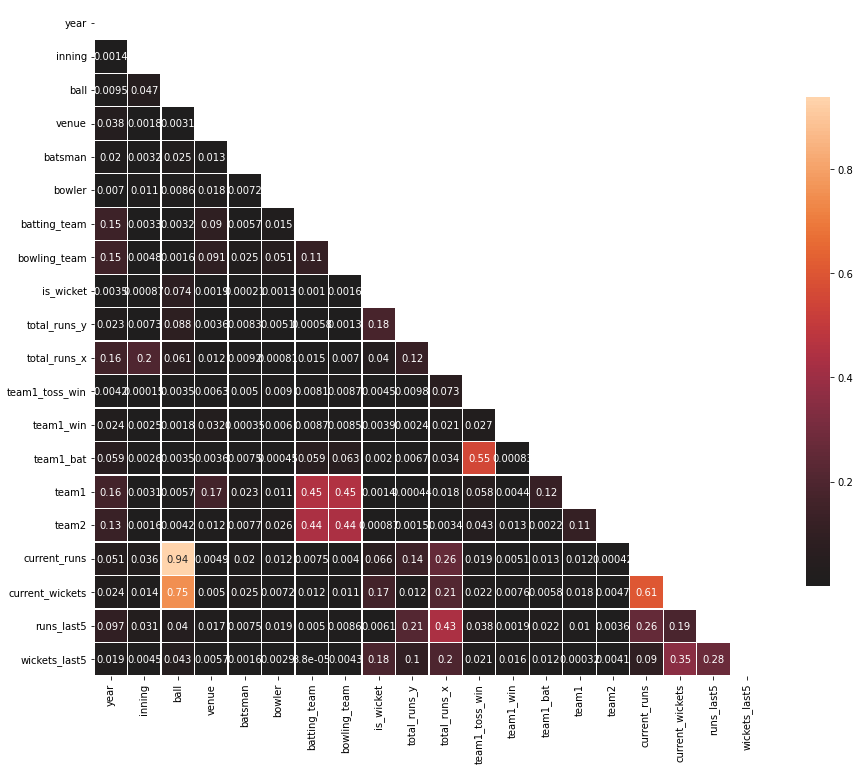

In [ ]:
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool) )

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap =  sns.diverging_palette(150, 275, s=80, l=55, n=20,as_cmap=True) 
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,    center=0,
            square=True, linewidths=.3, cbar_kws={"shrink": .5},annot=True)
plt.show()

Current runs and current wickets have high correlation with ball. But it is suppposed to be so, hence I am not droppping any of those columns

## Splitting Train and Test data

In [ ]:
X_train_data = df[df['year'] <2020]
X_train_data.tail()

,id_inning,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
86200,11817680,2019,2,20.2,24,372,350,0,8,0,1,148,1.0,1.0,1,8,0,143,5,58.0,1.0
86201,11817680,2019,2,20.3,24,456,350,0,8,0,2,148,1.0,1.0,1,8,0,145,5,60.0,1.0
86202,11817680,2019,2,20.4,24,456,350,0,8,1,1,148,1.0,1.0,1,8,0,146,6,59.0,2.0
86203,11817680,2019,2,20.5,24,448,350,0,8,0,2,148,1.0,1.0,1,8,0,148,6,61.0,2.0
86204,11817680,2019,2,20.6,24,448,350,0,8,1,0,148,1.0,1.0,1,8,0,148,7,60.0,3.0


In [ ]:
X_test_data = df[df['year']==2020]


In [ ]:
X_train_data.drop(columns= ['id_inning'],inplace = True)
X_test_data.drop(columns= ['id_inning'],inplace = True)

In [ ]:
X_train_data.head()

,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets,runs_last5,wickets_last5
26,2008,1,5.1,14,431,264,7,12,0,4,222,1.0,0.0,0,12,7,54,0,54.0,0.0
27,2008,1,5.2,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,55,0,55.0,0.0
28,2008,1,5.3,14,77,264,7,12,0,4,222,1.0,0.0,0,12,7,59,0,59.0,0.0
29,2008,1,5.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,59,0,59.0,0.0
30,2008,1,5.5,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,60,0,59.0,0.0


# Training the model


## Predicting Score

### Extracting the feature and target variables

In [ ]:
X_train_data.columns

Index(['year', 'inning', 'ball', 'venue', 'batsman', 'bowler', 'batting_team',
       'bowling_team', 'is_wicket', 'total_runs_y', 'total_runs_x',
       'team1_toss_win', 'team1_win', 'team1_bat', 'team1', 'team2',
       'current_runs', 'current_wickets', 'runs_last5', 'wickets_last5'],
      dtype='object')

In [ ]:
len(X_train_data.columns)

20

In [ ]:
reg_feature_columns = X_train_data.columns[[1,2,3,4,5,11,13,14,15,16,18,19]]
X_train_data.rename(columns={'total_runs_x': 'final_score'}, inplace=True)
X_test_data.rename(columns={'total_runs_x': 'final_score'}, inplace=True)
target = X_train_data.columns[10]
print(target)

final_score


In [ ]:
reg_feature_columns

Index(['inning', 'ball', 'venue', 'batsman', 'bowler', 'team1_toss_win',
       'team1_bat', 'team1', 'team2', 'current_runs', 'runs_last5',
       'wickets_last5'],
      dtype='object')

In [ ]:
len(reg_feature_columns)

12

In [ ]:
X_train = X_train_data[reg_feature_columns]
X_test = X_test_data[reg_feature_columns]
y_train = X_train_data[target]
y_test = X_test_data[target]

In [ ]:
print(X_train.shape)

(140925, 12)


In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#standardizing the data

### Defining Custom Functions for Evaluation

Defining custom accuracy for score prediction

In [ ]:
def custom_accuracy(y_test,y_pred,threshold=10):
    right = 0
    l = y_test.shape[0]
    for i in range(0,l-1):
        if(abs(y_pred[i]-y_test[i]) <= threshold):
            right += 1
        
    return ((right/l)*100)
#If predicted score is within 10 runs margin of actual score it is treated as correct prediction

Plot predicted and actual values

In [ ]:
def plotvals(y_test,y_pred) :

  fig = plt.figure(figsize=(9,6))
  sns.kdeplot(y_pred, shade=True, color="g", label="Predicted Values", alpha=.7)
  sns.kdeplot(y_test, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
  
  plt.title('Predicting Final Scores', fontsize=16)
  plt.legend()
  plt.show()

Function to return evaluation metrics for model

In [ ]:
def eval(y_test,y_pred,threshold=10) :
  mae = mean_absolute_error(y_test , y_pred)
  rmse=  np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test,y_pred)
  acc = custom_accuracy(y_test,y_pred,threshold)
  return {"MAE":mae,"RMSE":rmse,"R2score":r2,"Custom Accuracy":acc}

### Linear Regression 

In [ ]:
modeldict={}

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
y_pred = y_pred.astype(int)
y_pred.shape[0]

11517

In [ ]:
eval(y_test.values,y_pred)

{'Custom Accuracy': 47.19979161239906,
 'MAE': 14.691412694278023,
 'R2score': 0.5255066839745284,
 'RMSE': 19.380890360733822}

In [ ]:
modeldict['Linear Regression'] = eval(y_test.values,y_pred)

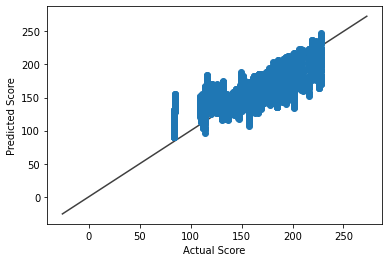

In [ ]:

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
fig,ax = plt.subplots()
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0) #plotting y=x line
ax.scatter(y_test,y_pred)
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
plt.show()

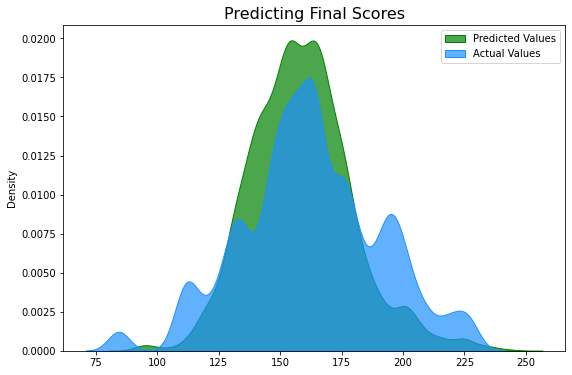

In [ ]:
plotvals(y_test.values,y_pred)

The predicted scores are evenly distributed on both sides of the line

### Elastic Net Regression

In [ ]:
reg = ElasticNet(l1_ratio= 0  ,alpha =1)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)  
scores = cross_val_score(reg, X_train, y_train , cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.03 accuracy with a standard deviation of 0.00


In [ ]:
reg = ElasticNet(l1_ratio= 0.99  ,alpha =0.01)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)  
scores = cross_val_score(reg, X_train, y_train , cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.51 accuracy with a standard deviation of 0.01


The higher accuracy indicates that this model has performed better. The values of l1_ratio is high i.e. absolute value of weights was penalized more in the cost function. This corresponds to lasso regression. Let us try lasso reg and see what accuracy do we get.

In [ ]:
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [ ]:
eval(y_test.values,y_pred)

{'Custom Accuracy': 45.30693757054788,
 'MAE': 14.655186362990978,
 'R2score': 0.5274393944284624,
 'RMSE': 19.341378876345992}

In [ ]:
modeldict['Elastic Net Regression'] = eval(y_test.values,y_pred)

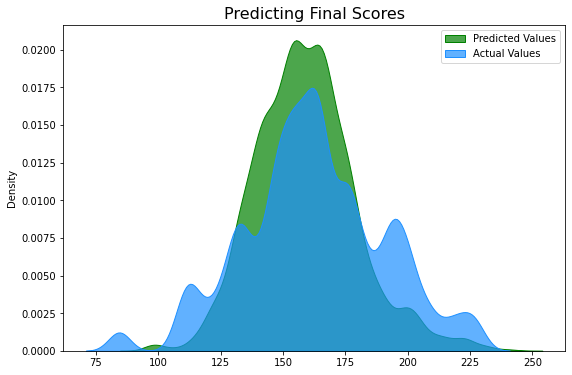

In [ ]:
plotvals(y_test.values,y_pred)

Elastic Net Model has slightly bad results compared to Linear Regression. 

### Lasso Regression

In [ ]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred = reg.predict(X_test)
result = eval(y_test.values,y_pred)
print(result)

{'MAE': 14.719712996780139, 'RMSE': 19.457104931487997, 'R2score': 0.521767494587332, 'Custom Accuracy': 45.758444039246335}


In [ ]:
modeldict['Lasso Regression'] = result

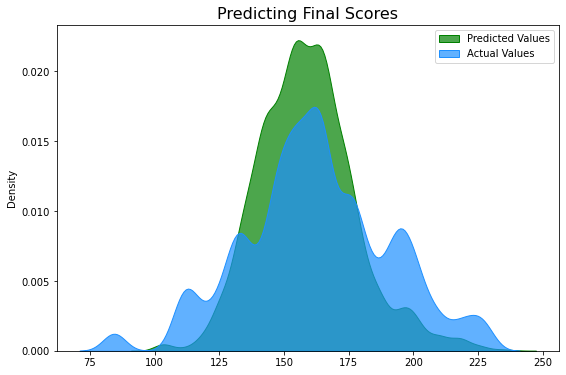

In [ ]:
plotvals(y_test.values,y_pred)

### SVR

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train )

SVR()

In [ ]:
y_pred = regressor.predict(X_test)


In [ ]:
eval(y_test.values,y_pred)

{'Custom Accuracy': 45.74976122254059,
 'MAE': 14.631978190385441,
 'R2score': 0.5301138805259941,
 'RMSE': 19.286569349316906}

In [ ]:
modeldict['SVR'] = eval(y_test.values,y_pred)

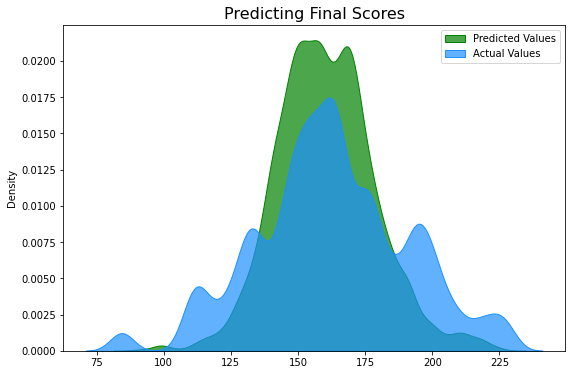

In [ ]:
plotvals(y_test.values,y_pred)

Not better than Linear Regression and also took lot of time to train.

### Random Forest

In [ ]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

Since higher no. of estimators and depth had given pretty good results in trials performing Grid Search below with higher values for both hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf2 = {
              "n_estimators": [250,500],
              "max_depth": [50,100,250],           
             }         
gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
gr_rf2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 100, 250],
                         'n_estimators': [250, 500]})

In [ ]:
gr_rf2.best_params_
#best params were max_depth= 250,n_estimators= 500

{'max_depth': 100, 'n_estimators': 500}

In [ ]:
%%time
rf_best2 = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=500,
                                    max_depth = 100,
                                    )
rf_best2.fit(X_train,y_train)
y_pred = rf_best2.predict(X_test)
score = rf_best2.score(X_test,y_test)


CPU times: user 6min 26s, sys: 4.38 s, total: 6min 31s
Wall time: 6min 39s


In [ ]:
eval(y_test.values,y_pred)

{'Custom Accuracy': 45.76712685595207,
 'MAE': 15.57745263523487,
 'R2score': 0.4481521276444853,
 'RMSE': 20.90106237926074}

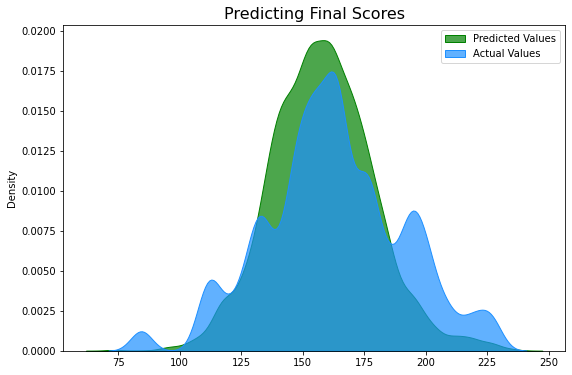

In [ ]:
plotvals(y_test.values,y_pred)

In [ ]:
predict_train = rf_best2.predict(X_train)

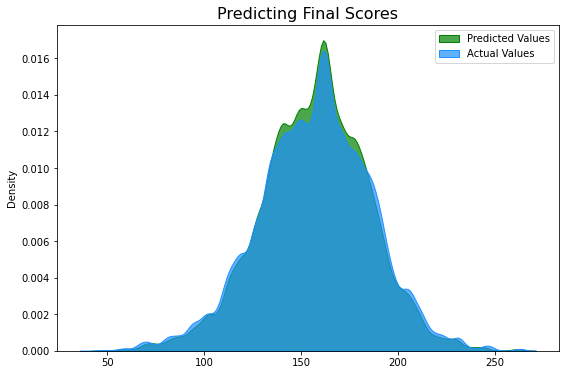

In [ ]:
plotvals(y_train.values,predict_train)

Thus we observe that the low accuracy of RF on test data is due to overfitting. AFter trying different models it was found that RF performed better on the original dataset without runs_last5 and wicket_last5 and when all the overs were present.

### Loading another modified dataset for better predictions

In [ ]:
!gdown --id  1XMlnxEcOJsQoNcybEqYf_X9VfKJcpJNY

Downloading...
From: https://drive.google.com/uc?id=1XMlnxEcOJsQoNcybEqYf_X9VfKJcpJNY
To: /content/ipl_predict_complex.csv
100% 13.3M/13.3M [00:00<00:00, 87.7MB/s]


In [ ]:
df_reg = pd.read_csv('/content/ipl_predict_complex.csv')

In [ ]:
df_reg = df_reg.drop(['Unnamed: 0','id_inning'],axis=1)

In [ ]:
df_reg.head()

,year,inning,ball,venue,batsman,bowler,batting_team,bowling_team,is_wicket,total_runs_y,total_runs_x,team1_toss_win,team1_win,team1_bat,team1,team2,current_runs,current_wickets
0,2008,1,1.1,14,431,264,7,12,0,1,222,1.0,0.0,0,12,7,1,0
1,2008,1,1.2,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,1,0
2,2008,1,1.3,14,77,264,7,12,0,1,222,1.0,0.0,0,12,7,2,0
3,2008,1,1.4,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,2,0
4,2008,1,1.5,14,77,264,7,12,0,0,222,1.0,0.0,0,12,7,2,0


In [ ]:
X_test_data = df_reg[df_reg['year']==2020]
X_train_data=df_reg[df_reg['year']<2020]


### Comparing Train and Test Data Distribution

In [ ]:
def comparedist(y_train,y_test,string):
  fig = plt.figure(figsize=(9,6))
  xaxis = np.arange(1, y_test.shape[0]+1,1)
  sns.kdeplot(y_train, shade=True, color="dodgerblue", label="Training Data", alpha=.5)
  sns.kdeplot(y_test, shade=True, color="purple", label="Test Data", alpha=.5)
  
  plt.title(f'Final Score distribution in Train and Test data ({string})', fontsize=12)
  plt.legend()
  plt.show()

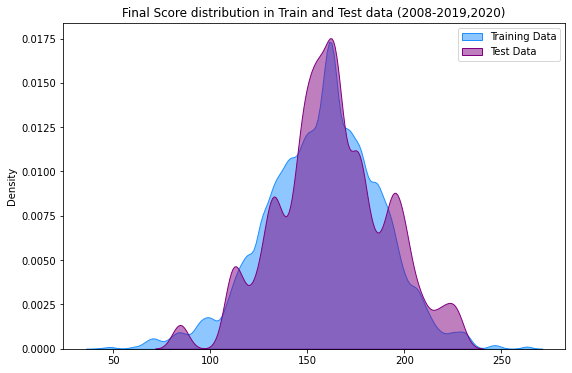

In [ ]:
comparedist(X_train_data['total_runs_x'].values,X_test_data['total_runs_x'].values,'2008-2019,2020')

Thus we see that there is considerable difference in the distribution of train and test data. This is likely due to the less relevant data of 2008,2009,etc. Let us use more recent data i.e. ahead of 2010 to see the new distributions

In [ ]:
X_train_data=df_reg[df_reg['year']>2012]


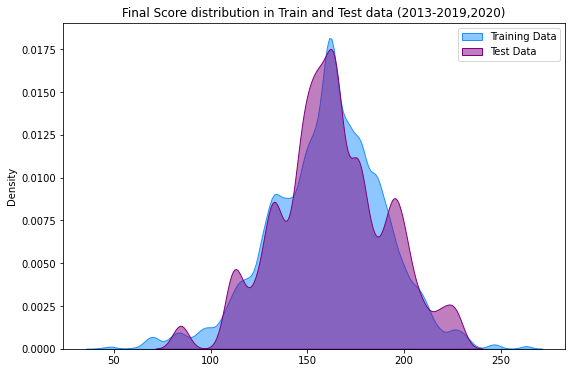

In [ ]:
comparedist(X_train_data['total_runs_x'].values,X_test_data['total_runs_x'].values,'2013-2019,2020')

This looks little better. Let us predict!

### Best Model For Score Prediction

In [ ]:
X_train_data.columns

Index(['year', 'inning', 'ball', 'venue', 'batsman', 'bowler', 'batting_team',
       'bowling_team', 'is_wicket', 'total_runs_y', 'total_runs_x',
       'team1_toss_win', 'team1_win', 'team1_bat', 'team1', 'team2',
       'current_runs', 'current_wickets'],
      dtype='object')

In [ ]:
features = X_train_data.columns[[1,2,3,4,5,11,13,14,15,16]]
X_train_data.rename(columns={'total_runs_x': 'final_score'}, inplace=True)
X_test_data.rename(columns={'total_runs_x': 'final_score'}, inplace=True)
target = X_train_data.columns[10]
print(target)

final_score


In [ ]:
features

Index(['inning', 'ball', 'venue', 'batsman', 'bowler', 'team1_toss_win',
       'team1_bat', 'team1', 'team2', 'current_runs'],
      dtype='object')

In [ ]:
X_train = X_train_data[features]
X_test = X_test_data[features]
y_train = X_train_data[target]
y_test = X_test_data[target]

In [ ]:
print(X_train.shape)

(116806, 10)


In [ ]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#standardizing the data

In [ ]:
%%time
model = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=500,
                                    max_depth = 250
                                    )
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)


CPU times: user 4min 14s, sys: 1.48 s, total: 4min 15s
Wall time: 4min 14s


In [ ]:
print(score)

0.9942578752441237


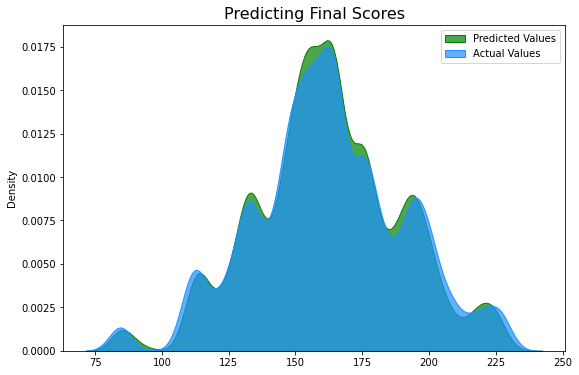

In [ ]:
plotvals(y_test.values,y_pred)

And it worked!!!

Saving the model

In [ ]:
import pickle
# filename = '/content/drive/MyDrive/WiDS_IPL/best_score_predictor.sav'

# pickle.dump(model, open(filename, 'wb'))

In [ ]:
!gdown --id 1m-lNx9Z8pPwzBhK-8_4k2wapkfom1LEQ 

Downloading...
From: https://drive.google.com/uc?id=1m-lNx9Z8pPwzBhK-8_4k2wapkfom1LEQ
To: /content/best_score_predictor.sav
100% 1.98G/1.98G [00:17<00:00, 113MB/s] 


In [ ]:
rf_model = pickle.load(open('/content/best_score_predictor.sav', 'rb'))

In [ ]:
y_pred = rf_model.predict(X_test)
result = eval(y_test.values,y_pred)

In [ ]:
result

{'Custom Accuracy': 99.67608545830461,
 'MAE': 1.3701909292441996,
 'R2score': 0.9942578752441237,
 'RMSE': 2.140374258625222}

Random Forest model turned out to be the best model for this data

### XGBoost

In [ ]:
import xgboost
from xgboost import plot_importance
from scipy.stats import skew
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(learning_rate =0.1, n_estimators=500, max_depth=5,
    min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)

In [ ]:
xgb_model.fit(X_train,y_train)

[06:42:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=500, nthread=6,
             seed=27, subsample=0.8)

In [ ]:
y_pred = xgb_model.predict(X_test)
result = eval(y_test.values,y_pred)


In [ ]:
result

{'Custom Accuracy': 66.36802205375602,
 'MAE': 8.726485180213976,
 'R2score': 0.8363803625587207,
 'RMSE': 11.425392285253528}

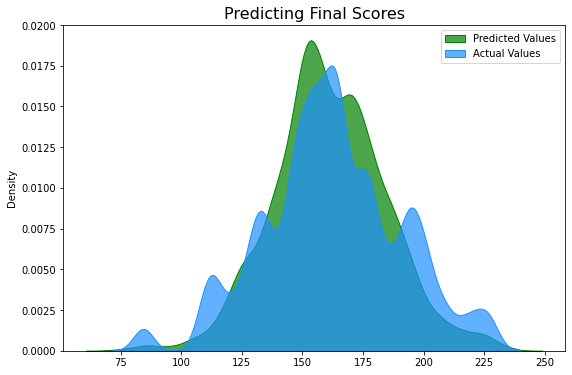

In [ ]:
plotvals(y_test.values,y_pred)

## Predicting Winner of Match

### Extracting feature and target variables

In [3]:
!gdown --id 1lXRko3Bq6c0O55Y5RoD1vURTZCYfSJfT 

Downloading...
From: https://drive.google.com/uc?id=1lXRko3Bq6c0O55Y5RoD1vURTZCYfSJfT
To: /content/ipl_predict_winner.csv
100% 32.4M/32.4M [00:00<00:00, 180MB/s]


In [4]:
data = pd.read_csv('/content/ipl_predict_winner.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,id,id_inning,total_runs_x,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs_y,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,year,team1_win,team1_toss_win,team1_bat
0,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.1,431,77,264,0,1,1,0,0,NaN,NaN,NaN,legbyes,7,12,2008,0.0,1.0,0
1,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.2,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
2,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.3,77,427,264,0,1,1,0,0,NaN,NaN,NaN,wides,7,12,2008,0.0,1.0,0
3,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.4,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0
4,335982,3359827,222,Bangalore,2008-04-18,BB McCullum,14,0,12,7,12,field,7,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,1,1,1.5,77,427,264,0,0,0,0,0,NaN,NaN,NaN,NaN,7,12,2008,0.0,1.0,0


In [6]:
df = pd.DataFrame()
for i in range(len(data['id'].unique())):
    one_inning = data.loc[data['id']==data['id'].unique()[i]]
    one_inning = one_inning.sort_values(['inning'],ascending=[True])
    row = one_inning.iloc[1]
    row['target_score'] = row['total_runs_x']
    row =row[['year','venue','team1_toss_win','team1_bat','target_score','team1','team2','team1_win']]
    temp = pd.DataFrame(columns =row.index)
    temp.loc[0]=row.values
    frame = [df,temp]
    df = pd.concat(frame)
print(data.shape)
print(df.shape)

(193096, 40)
(812, 8)


In [7]:
len(data['id'].unique())

812

In [8]:
df

,year,venue,team1_toss_win,team1_bat,target_score,team1,team2,team1_win
0,2008,14,1.0,0,222,12,7,0.0
0,2008,23,0.0,0,240,5,0,0.0
0,2008,8,0.0,0,129,3,10,1.0
0,2008,35,1.0,1,165,8,12,0.0
0,2008,7,0.0,0,110,7,1,1.0
...,...,...,...,...,...,...,...,...
0,2020,6,0.0,0,201,12,8,1.0
0,2020,6,0.0,0,200,8,2,1.0
0,2020,30,0.0,0,131,12,13,0.0
0,2020,30,1.0,1,189,2,13,1.0


In [9]:
df_win = df.copy()

In [10]:
df_win.drop('year',axis=1,inplace=True)
# removing year from feature importance process

### Extra Trees Classifier for feature importance

In [11]:
len(df_win.columns)

7

In [12]:
X = df_win.iloc[:,0:6]  #independent columns
y = df_win.iloc[:,6]    #target column i.e price range
model = ExtraTreesClassifier()
model.fit(X ,y )
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)


[0.18883368 0.02260975 0.02791036 0.40275877 0.14199513 0.21589232]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



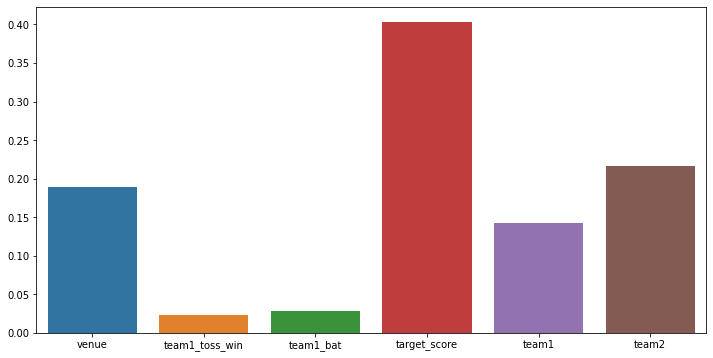

In [13]:
fig = plt.figure(figsize=(12,6))
sns.barplot(feat_importances.index,feat_importances.values)
plt.show()

In [14]:
class_feature_columns=feat_importances.index

In [15]:
X_win_train_data= df[df['year']<2020] 
X_win_test_data= df[df['year']==2020] 
# X_win_train_data = X_win_train_data[X_win_train_data['year']>2012]

In [16]:
len(X_win_train_data)

752

In [17]:
X_win_train_data.head()

,year,venue,team1_toss_win,team1_bat,target_score,team1,team2,team1_win
0,2008,14,1.0,0,222,12,7,0.0
0,2008,23,0.0,0,240,5,0,0.0
0,2008,8,0.0,0,129,3,10,1.0
0,2008,35,1.0,1,165,8,12,0.0
0,2008,7,0.0,0,110,7,1,1.0


In [18]:
X_win_train_data.drop('year',axis=1,inplace=True)
X_win_test_data.drop('year',axis=1,inplace=True)

In [19]:
class_feature_columns

Index(['venue', 'team1_toss_win', 'team1_bat', 'target_score', 'team1',
       'team2'],
      dtype='object')

In [20]:
target= 'team1_win'
X_train = X_win_train_data[class_feature_columns]
X_test = X_win_test_data[class_feature_columns]
y_train = X_win_train_data[target]
y_test = X_win_test_data[target]

In [21]:
X_train.columns

Index(['venue', 'team1_toss_win', 'team1_bat', 'target_score', 'team1',
       'team2'],
      dtype='object')

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#standardizing the data

In [ ]:
target= 'team1_win'
X_train1 = X_win_train_data[class_feature_columns]
X_test1 = X_win_test_data[class_feature_columns]

In [ ]:
sc = MinMaxScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)
#standardizing the data

### Defining Custom Functions for Evaluation

Function to return evaluation metrics

In [ ]:
#f1_score,accuracy_score , roc_auc_score

In [36]:
def class_report(y_test,y_pred):
  f1 = f1_score(y_test,y_pred)
  acc = accuracy_score(y_test,y_pred)
  rocauc = roc_auc_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall=recall_score(y_test,y_pred) 
  return {'F1_score':f1,'Accuracy':acc,'Area under ROC curve':rocauc,'Precision':precision,'Recall':recall}

### Logistic Regression

In [ ]:
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

415
337


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
result = class_report(y_test,y_pred)

In [ ]:
result

{'Accuracy': 0.4666666666666667,
 'Area under ROC curve': 0.4666666666666667,
 'F1_score': 0.627906976744186,
 'Precision': 0.48214285714285715,
 'Recall': 0.9}

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train)
y_pred = logreg.predict(X_test1)
result = class_report(y_test,y_pred)
print(result)

{'F1_score': 0.6363636363636364, 'Accuracy': 0.4666666666666667, 'Area under ROC curve': 0.4666666666666667, 'Precision': 0.4827586206896552, 'Recall': 0.9333333333333333}


### Decision Tree Classifier

In [ ]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier(max_depth=40)
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))
 

Accuracy of Decision Tree Classifier on test set: 0.5833


In [ ]:
result = class_report(y_test,y_pred)
print(result)

{'F1_score': 0.5454545454545454, 'Accuracy': 0.5833333333333334, 'Area under ROC curve': 0.5833333333333334, 'Precision': 0.6, 'Recall': 0.5}


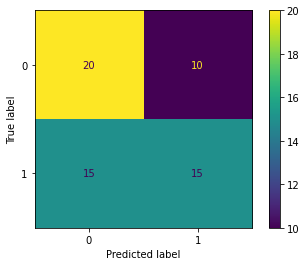

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train1,y_train)
y_pred = dtree.predict(X_test1)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test1, y_test)))
#Standard Scaler

Accuracy of Decision Tree Classifier on test set: 0.5500


Thus, from initial trials we see that StandardScaler works better than MinMaxScaler

### SVM

In [ ]:
n = 10
#SVM
SVC = SVC(kernel="linear", C=0.5).fit(X_train,y_train)
 

In [ ]:
y_pred = SVC.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(clf.score(X_test, y_test)))


Accuracy of SVM Classifier on test set: 0.5000


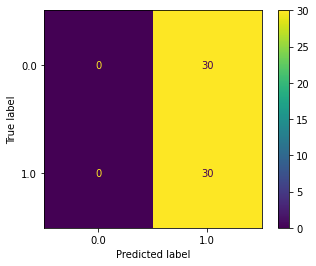

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

Decision Tree Classifier has pretty good accuracy and also took lot less time to train. Let's try RF now

### Random Forest

In [ ]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=10,max_depth = 100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.6000


In [ ]:
result = class_report(y_test,y_pred)
print(result)

{'F1_score': 0.5555555555555556, 'Accuracy': 0.6, 'Area under ROC curve': 0.5999999999999999, 'Precision': 0.625, 'Recall': 0.5}


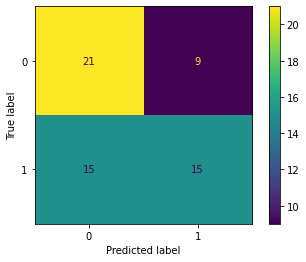

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

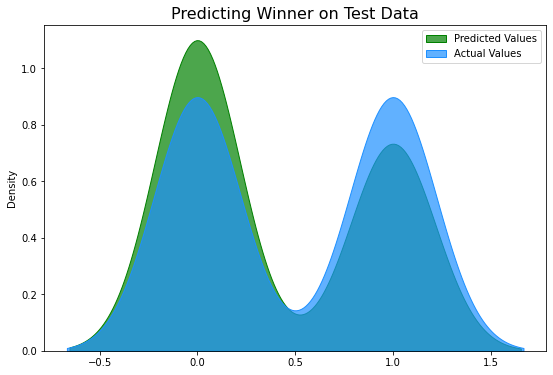

In [ ]:
fig = plt.figure(figsize=(9,6))
# xaxis = np.arange(1, y_pred.shape[0]+1,1)
sns.kdeplot(y_pred, shade=True, color="g", label="Predicted Values", alpha=.7)
sns.kdeplot(y_test.values, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
plt.title('Predicting Winner on Test Data', fontsize=16)
plt.legend()
plt.show()

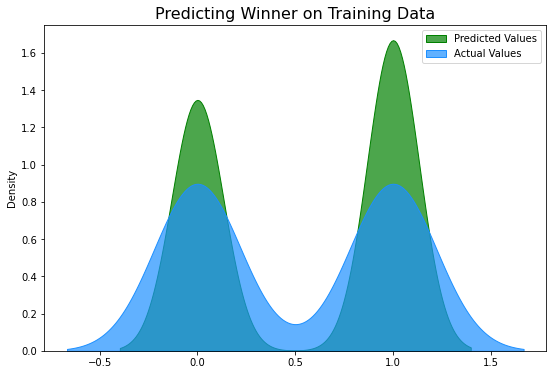

In [ ]:
fig = plt.figure(figsize=(9,6))
# xaxis = np.arange(1, y_pred.shape[0]+1,1)
sns.kdeplot(randomForest.predict(X_train), shade=True, color="g", label="Predicted Values", alpha=.7)
sns.kdeplot(y_test.values, shade=True, color="dodgerblue", label="Actual Values", alpha=.7)
plt.title('Predicting Winner on Training Data', fontsize=16)
plt.legend()
plt.show()

In [ ]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=20,max_depth = 250)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.6167


Fine-tuning RF Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,25,50,100,250,500]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 50, 100, 250,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 250,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1155}

In [ ]:
rf_random.best_score_

0.6037290836653386

In [ ]:
frame = pd.DataFrame(rf_random.cv_results_)

In [ ]:
frame.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.657045,0.419426,0.839434,0.070302,2000,2,1,sqrt,500,False,"{'n_estimators': 2000, 'min_samples_split': 2,...",0.597610,0.569721,0.556,0.574444,0.017312,93
1,5.918322,1.165881,0.503100,0.099868,1788,2,2,sqrt,100,True,"{'n_estimators': 1788, 'min_samples_split': 2,...",0.621514,0.573705,0.600,0.598406,0.019550,12
2,1.788677,0.011579,0.186880,0.011617,733,2,1,sqrt,500,False,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.601594,0.565737,0.556,0.574444,0.019605,93
3,1.575717,0.009207,0.180747,0.003994,733,2,2,auto,10,False,"{'n_estimators': 733, 'min_samples_split': 2, ...",0.589641,0.593625,0.584,0.589089,0.003949,60
4,4.617233,0.019739,0.411869,0.002540,1788,2,4,auto,250,True,"{'n_estimators': 1788, 'min_samples_split': 2,...",0.597610,0.557769,0.596,0.583793,0.018413,76


In [28]:
#Random Forest Classifier
randomForest= RandomForestClassifier(bootstrap=False,
 max_depth= 250,
 max_features='auto',
 min_samples_leaf= 2,
 min_samples_split=10
 ,n_estimators=1155)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))


Accuracy of Random Forest Classifier on test set: 0.5833


In [ ]:
y_pred= rf_random.best_estimator_.predict(X_test)

In [ ]:
class_report(y_test.values,y_pred)

{'Accuracy': 0.5833333333333334,
 'Area under ROC curve': 0.5833333333333334,
 'F1_score': 0.5454545454545454,
 'Precision': 0.6,
 'Recall': 0.5}

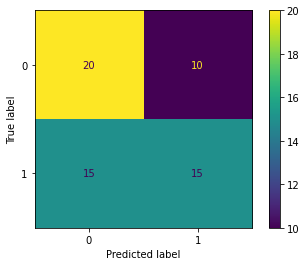

In [ ]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Tuning again on lower n_estimator values


In [30]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.arange(5, 100,5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,25,50,100,250,500]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 25, 50, 100, 250,
                                                      500],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 15, 20, 25, 30,
                                                         35, 40, 45, 50, 55, 60,
                                                         65, 70, 75, 80, 85, 90,
                                                         95]},
                   random_state=42, verbose=2)

In [32]:
print(rf_random.best_params_)
print(f"The best score obtained was :{rf_random.best_score_}")

{'n_estimators': 55, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 500, 'bootstrap': False}
The best score obtained was :0.6103851261620186


In [33]:
y_pred= rf_random.best_estimator_.predict(X_test)

In [37]:
class_report(y_test.values,y_pred)

{'Accuracy': 0.6166666666666667,
 'Area under ROC curve': 0.6166666666666666,
 'F1_score': 0.5818181818181818,
 'Precision': 0.64,
 'Recall': 0.5333333333333333}

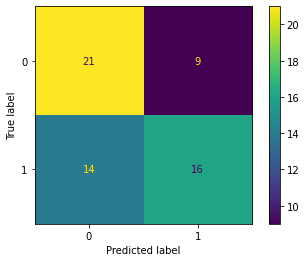

In [38]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

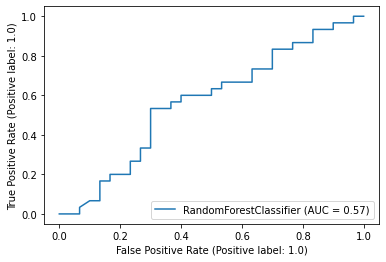

In [39]:
from sklearn import metrics
display = metrics.RocCurveDisplay.from_estimator(rf_random.best_estimator_,X_test,y_test)
plt.show()

Done!